In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [14]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [25]:
train_path="/content/drive/MyDrive/soil/train"
test_path="/content/drive/MyDrive/soil/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [24]:
print(class_names)
print(class_names_test)

['black soil', 'cinder soil', 'clay soil', 'laterite soil', 'peat soil', 'yellow soil']
['black soil', 'cinder soil', 'clay soil', 'laterite soil', 'peat soil', 'yellow soil']


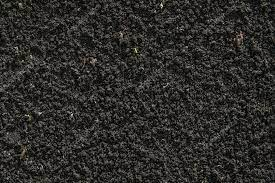

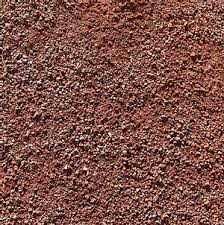

In [66]:
#Sample datasets images
from google.colab.patches import cv2_imshow
import cv2
img=cv2.imread("/content/drive/MyDrive/soil/test/black soil/2.jpg")
cv2_imshow(img)
img=cv2.imread("/content/drive/MyDrive/soil/test/cinder soil/25.jpg")
cv2_imshow(img)

In [38]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [40]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/soil/train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/soil/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 153 images belonging to 6 classes.
Found 39 images belonging to 6 classes.


In [41]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model

In [42]:
model=VGG16()

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [44]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [ ]:
Vgg16.load_weights("/content/gdrive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [46]:
for layer in Vgg16.layers:
    layer.trainable = False

In [47]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7fe695dfdb90> False
<keras.layers.convolutional.Conv2D object at 0x7fe695deddd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe695e25810> False
<keras.layers.convolutional.Conv2D object at 0x7fe695e38290> False
<keras.layers.convolutional.Conv2D object at 0x7fe695da8b10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe720c3f650> False
<keras.layers.convolutional.Conv2D object at 0x7fe720c42450> False
<keras.layers.convolutional.Conv2D object at 0x7fe720c33290> False
<keras.layers.convolutional.Conv2D object at 0x7fe720c48490> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe720c52950> False
<keras.layers.convolutional.Conv2D object at 0x7fe720c33050> False
<keras.layers.convolutional.Conv2D object at 0x7fe695dc4050> False
<keras.layers.convolutional.Conv2D object at 0x7fe695e250d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe720c330d0> False
<keras.layers.convolutional.Conv2D object at 0x7fe720c582d0> F

In [48]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [50]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [51]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
5/5 [==============================] - 46s 6s/step - loss: 0.0401 - accuracy: 0.1699 - val_loss: -1.8635 - val_accuracy: 0.1538
Epoch 2/100
5/5 [==============================] - 3s 500ms/step - loss: -2.8884 - accuracy: 0.1569 - val_loss: -5.5903 - val_accuracy: 0.1538
Epoch 3/100
5/5 [==============================] - 3s 498ms/step - loss: -6.6754 - accuracy: 0.1569 - val_loss: -10.5506 - val_accuracy: 0.1538
Epoch 4/100
5/5 [==============================] - 3s 492ms/step - loss: -11.7899 - accuracy: 0.1569 - val_loss: -19.0194 - val_accuracy: 0.1538
Epoch 5/100
5/5 [==============================] - 3s 495ms/step - loss: -21.2168 - accuracy: 0.1569 - val_loss: -32.9737 - val_accuracy: 0.1538
Epoch 6/100
5/5 [==============================] - 3s 496ms/step - loss: -36.7531 - accuracy: 0.1569 - val_loss: -58.8364 - val_accuracy: 0.1538
Epoch 7/100
5/5 [==============================] - 3s 496ms/step - loss: -67.7759 - accuracy: 0.1569 - val_loss: -108.9029 - val_accuracy:

In [52]:
model.load_weights("/content/gdrive/My Drive/best_model.h5")

In [56]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[nan, 0.20512820780277252]

In [57]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/model.json","w") as json_file:
  json_file.write(model_json)

In [58]:
from keras.models import model_from_json

In [71]:
def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/gdrive/My Drive/model.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/gdrive/My Drive/best_model.h5")
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    if preds==0:
        print("Predicted Label: cindersoil")
    else:
        print("Predicted Label: blacksoil")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


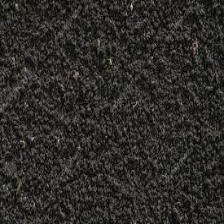

Predicted Label: blacksoil


In [72]:
predict_("/content/drive/MyDrive/soil/test/black soil/2.jpg")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


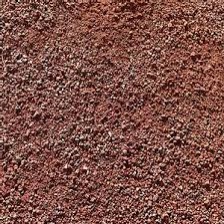

Predicted Label: blacksoil


In [73]:
predict_("/content/drive/MyDrive/soil/test/cinder soil/25.jpg")